# Lab 1: Bootstrapping

Megan Thompson-Munson

In [19]:
# Import necessary libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

# Set-up figure parameters
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('png')

%matplotlib inline

## Read in and examine data

In [20]:
# Create dataframe from .csv file and print the first few lines
filename='snow_enso_data.csv'
data=pd.read_csv(filename,sep=',',names=['Year','SWE','SST_anom'],skiprows=1)
data.head()

,Year,SWE,SST_anom
0,1936,15.8,-0.04
1,1937,10.1,0.63
2,1938,12.1,0.22
3,1939,18.2,-0.79
4,1940,10.0,0.05


In [21]:
print('Year: ' + str(data['Year'].values))
print('SWE: ' + str(data['SWE'].values))
print('SST anomaly: ' + str(data['SST_anom'].values))

Year: [1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949
 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]
SWE: [15.8 10.1 12.1 18.2 10.   9.9 13.9 17.9 11.4 13.3 11.4 17.4 14.  14.
 14.  19.  24.  17.3 11.2 13.5 21.2 17.5 14.9 18.7 16.4 15.3 19.2 12.
 12.7 19.9  6.3 14.6 16.1 14.2 20.7 19.  16.2 12.  18.8 19.6 15.1 11.
 22.1 16.7 20.   9.  19.8 15.5 18.  12.3 18.2 11.3 15.9 12.1 13.8 13.2
 14.2 21.8 17.8 17.2 28.7 22.6 17.2 16.5 19.6 17.2 10.  19.9 13.1 15.6
 22.4 19.7 21.2 21.6 14.3 27.3 12.8 14.9 24.4 16.4 19. ]
SST anomaly: [-0.04  0.63  0.22 -0.79  0.05  1.39  1.27 -1.24 -0.42 -0.26 -0.54  0.03
  0.18  0.38 -1.2  -1.04  0.71 -0.55  0.15 -0.79 -1.52 -0.58  1.18  0.3
 -0.05  0.

***

## Plot raw data

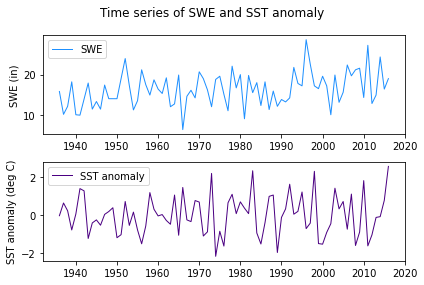

In [22]:
# Create figure with two subplots
fig, ax = plt.subplots(2,1,figsize=(6,4))

# Add title
fig.suptitle('Time series of SWE and SST anomaly')

# Plot data
ax[0].plot(data['Year'],data['SWE'],label='SWE',c='dodgerblue',lw=1)
ax[1].plot(data['Year'],data['SST_anom'],label='SST anomaly',c='indigo',lw=1)

# Set axis labels and add legend
ax[0].set_ylabel('SWE (in)')
ax[1].set_ylabel('SST anomaly (deg C)')
ax[0].legend()
ax[1].legend()

plt.tight_layout()

***

## Calculate basic statistics on the SWE record

### Full record statistics

In [23]:
# Calculate mean SWE
SWE_avg = data['SWE'].mean()
SWE_std = data['SWE'].std()
SWE_n = len(data['SWE'])

# Print statistics
print('Full record SWE statistics:\n')
print('Mean = {:.2f} in'.format(SWE_avg))
print('Std. dev. = {:.2f} in'.format(SWE_std))
print('n = {}'.format(SWE_n))

Full record SWE statistics:

Mean = 16.33 in
Std. dev. = 4.22 in
n = 81


### El Niño statistics

In [24]:
# El Nino years are when the anomaly is greater than 1 deg C

# Calculate mean SWE
SWE_avgElNino = data[data.SST_anom>1]['SWE'].mean()
SWE_stdElNino = data[data.SST_anom>1]['SWE'].std()
SWE_nElNino = len(data[data.SST_anom>1])

# Print statistics
print('El Nino SWE statistics:\n')
print('Mean = {:.2f} in'.format(SWE_avgElNino))
print('Std. dev. = {:.2f} in'.format(SWE_stdElNino))
print('n = {}'.format(SWE_nElNino))

El Nino SWE statistics:

Mean = 15.29 in
Std. dev. = 4.00 in
n = 16


### La Niña statistics

In [25]:
# La Nina years are when the anomaly is less than -1 deg C

# Calculate mean SWE
SWE_avgLaNina = data[data.SST_anom<-1]['SWE'].mean()
SWE_stdLaNina = data[data.SST_anom<-1]['SWE'].std()
SWE_nLaNina = len(data[data.SST_anom<-1])

# Print statistics
print('La Nina SWE statistics:\n')
print('Mean = {:.2f} in'.format(SWE_avgLaNina))
print('Std. dev. = {:.2f} in'.format(SWE_stdLaNina))
print('n = {}'.format(SWE_nLaNina))

La Nina SWE statistics:

Mean = 17.78 in
Std. dev. = 4.11 in
n = 15


***

# <font color='#F08D2F'>Question 1 </font>

In [26]:
# Create arrays for summary dataframe
statsData = [[16.33,15.29,17.78],[4.22,4.00,4.11],[81,16,15]]
cols = ['Mean (in)','Std. dev. (in)','n']
idxs = ['All years','El Niño years','La Niña years']

# Create and print dataframe
dfSummary = pd.DataFrame(data=np.transpose(statsData),columns=cols,index=idxs)
dfSummary = dfSummary.astype({'n':'int32'})
dfSummary

,Mean (in),Std. dev. (in),n
All years,16.33,4.22,81
El Niño years,15.29,4.00,16
La Niña years,17.78,4.11,15


***

## Hypothesis testing

### Steps to hypothesis testing:
1. State the significance level ($\alpha$)
2. State the null hypothesis ($H_0$) and alternative hypothesis ($H_1$) 
3. State the statistic to be used, and the assumptions required to use it
4. State the critical region
5. Evaluate the statistic and state the conclusion

***

# <font color='#F08D2F'>Question 2 </font>

1. $\alpha$ = 0.05 (95% confidence level)
2. $H_0$ (El Niño): The difference between the mean SWE during El Niño years and the mean SWE for all years is equal to 0.

    $H_0$ (La Niña): The difference between the mean SWE during La Niña years and the mean SWE for all years is equal to 0.
    
    $H_1$ (both): The difference does not equal 0.
    
3. Assume the distribution of SWE values is normally distributed. Here, we will use bootstrapping with Nbs = 1000 in order to artificially increase the sample size and then use the z-statistic.
4. Two-tailed z-test so |z| > z$_{0.025}$ (|z| > 1.96) to reject the null hypothesis.
5. El Niño: z = -0.99 so we fail to reject the null hypothesis. 

    La Niña: z = 1.34 so we fail to reject the null hypothesis.
    
***

### Bootstrapping

In [27]:
# Set number of bootstrap times to 1000
Nbs = 1000

# Initialize array with correct dimensions
P_Bootstrap = np.empty((Nbs,SWE_nElNino))

# Loop over length of Nbs and fill array with randomly selected values
for i in range(Nbs):
    P_Bootstrap[i,:] = np.random.choice(data.SWE,SWE_nElNino)

# Calculate the means of randomly selected SWE value
P_Bootstrap_mean = np.mean(P_Bootstrap,axis=1)

# Print information about the array
print('Array of bootstrapped means statistics:\n')
print('Mean = {:.2f} in'.format(np.mean(P_Bootstrap_mean)))
print('Std. dev. = {:.2f} in'.format(np.std(P_Bootstrap_mean)))
print('Min = {:.2f} in'.format(np.min(P_Bootstrap_mean)))
print('Max = {:.2f} in'.format(np.max(P_Bootstrap_mean)))
print('n = {}'.format(len(P_Bootstrap_mean)))

Array of bootstrapped means statistics:

Mean = 16.32 in
Std. dev. = 1.04 in
Min = 12.89 in
Max = 19.94 in
n = 1000


***

# <font color='#F08D2F'>Question 2a </font>

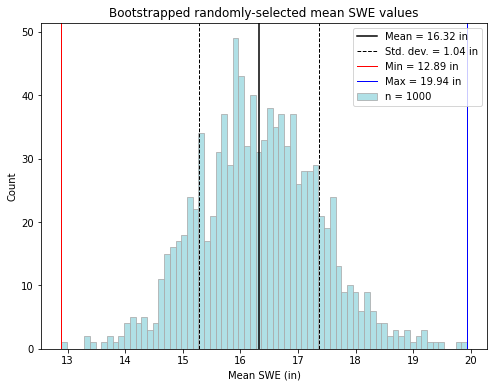

In [28]:
# Plot histogram of bootstrapped means

# Set histogram parameters
binsize = 0.1
minHist = np.round(np.min(P_Bootstrap_mean),1) - binsize
maxHist = np.round(np.max(P_Bootstrap_mean),1) + binsize
nbins = int((maxHist-minHist)/binsize)

# Create plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.hist(P_Bootstrap_mean, nbins, color='powderblue', edgecolor='darkgrey',lw=0.75,label='n = {}'.format(len(P_Bootstrap_mean)))
ax.axvline(np.mean(P_Bootstrap_mean),c='k',lw=1.5,label='Mean = {:.2f} in'.format(np.mean(P_Bootstrap_mean)))
ax.axvline(np.mean(P_Bootstrap_mean)+np.std(P_Bootstrap_mean),c='k',lw=1,ls='--',label='Std. dev. = {:.2f} in'.format(np.std(P_Bootstrap_mean)))
ax.axvline(np.mean(P_Bootstrap_mean)-np.std(P_Bootstrap_mean),c='k',lw=1,ls='--')
ax.axvline(np.min(P_Bootstrap_mean),c='r',lw=1,label='Min = {:.2f} in'.format(np.min(P_Bootstrap_mean)))
ax.axvline(np.max(P_Bootstrap_mean),c='b',lw=1,label='Max = {:.2f} in'.format(np.max(P_Bootstrap_mean)))

# Add labels and titles
ax.legend()
plt.xlabel('Mean SWE (in)')
plt.ylabel('Count')
plt.title('Bootstrapped randomly-selected mean SWE values')
plt.show()

***

# <font color='#F08D2F'>Question 2b </font>

### <font color='#F08D2F'>What is the probability that differences between the El Niño composite and all years occurred by chance?</font>

Answer: 32.05%

In [29]:
# Calculate probability using z-statistic

# Sample statistics
sampleMean = SWE_avgElNino
sampleStd = 1

# Population statistics
populationMean = np.mean(P_Bootstrap_mean)
populationStd = np.std(P_Bootstrap_mean)

# Calculate z and probability (two-sided)
xstd = populationStd / np.sqrt(sampleStd)
zElNino = (sampleMean-populationMean) / xstd
probElNino = (1-stats.norm.cdf(np.abs(zElNino)))*2*100

# Print information
print('Sample mean = {:.2f} in'.format(sampleMean))
print('Population mean = {:.2f} in'.format(populationMean))
print('Population std. dev. = {:.2f} in'.format(populationStd))
print('z-statistic = {:.2f}'.format(zElNino))
print('Two-tailed test probability = {:.2f}%'.format(probElNino))

Sample mean = 15.29 in
Population mean = 16.32 in
Population std. dev. = 1.04 in
z-statistic = -0.99
Two-tailed test probability = 32.39%


### <font color='#F08D2F'>What is the probability that differences between the La Niña composite and all years occurred by chance?</font>

Answer: 18.18%

In [30]:
# Calculate probability using z-statistic

# Sample statistics
sampleMean = SWE_avgLaNina
sampleStd = 1

# Population statistics
populationMean = np.mean(P_Bootstrap_mean)
populationStd = np.std(P_Bootstrap_mean)

# Calculate z and probability (two-sided)
xstd = populationStd / np.sqrt(sampleStd)
zLaNina = (sampleMean-populationMean) / xstd
probLaNina = (1-stats.norm.cdf(np.abs(zLaNina)))*2*100

# Print information
print('Sample mean = {:.2f} in'.format(sampleMean))
print('Population mean = {:.2f} in'.format(populationMean))
print('Population std. dev. = {:.2f} in'.format(populationStd))
print('z-statistic = {:.2f}'.format(zLaNina))
print('Two-tailed test probability = {:.2f}%'.format(probLaNina))

Sample mean = 17.78 in
Population mean = 16.32 in
Population std. dev. = 1.04 in
z-statistic = 1.40
Two-tailed test probability = 16.30%


***

# <font color='#F08D2F'>Question 3 </font>

Change El Niño and La Niña threshold to 0.5 and -0.5, respectively.

### El Niño w/Different Threshold

In [31]:
# El Nino years are when the anomaly is greater than 0.5 deg C

# Calculate mean SWE
SWE_avgElNinoNew = data[data.SST_anom>0.5]['SWE'].mean()
SWE_stdElNinoNew = data[data.SST_anom>0.5]['SWE'].std()
SWE_nElNinoNew = len(data[data.SST_anom>0.5])

# Print statistics
print('El Nino SWE statistics:\n')
print('Mean = {:.2f} in'.format(SWE_avgElNinoNew))
print('Std. dev. = {:.2f} in'.format(SWE_stdElNinoNew))
print('n = {}'.format(SWE_nElNinoNew))

El Nino SWE statistics:

Mean = 15.52 in
Std. dev. = 4.23 in
n = 25


### La Niña w/Different Threshold

In [32]:
# La Nina years are when the anomaly is less than -0.5 deg C

# Calculate mean SWE
SWE_avgLaNinaNew = data[data.SST_anom<-0.5]['SWE'].mean()
SWE_stdLaNinaNew = data[data.SST_anom<-0.5]['SWE'].std()
SWE_nLaNinaNew = len(data[data.SST_anom<-0.5])

# Print statistics
print('La Nina SWE statistics:\n')
print('Mean = {:.2f} in'.format(SWE_avgLaNinaNew))
print('Std. dev. = {:.2f} in'.format(SWE_stdLaNinaNew))
print('n = {}'.format(SWE_nLaNinaNew))

La Nina SWE statistics:

Mean = 18.09 in
Std. dev. = 4.18 in
n = 27


### Bootstrapping

In [33]:
# Set number of bootstrap times to 1000
Nbs = 1000

# Initialize array with correct dimensions
P_BootstrapNew = np.empty((Nbs,SWE_nElNinoNew))

# Loop over length of Nbs and fill array with randomly selected values
for i in range(Nbs):
    P_BootstrapNew[i,:] = np.random.choice(data.SWE,SWE_nElNinoNew)

# Calculate the means of randomly selected SWE value
P_Bootstrap_meanNew = np.mean(P_BootstrapNew,axis=1)

# Print information about the array
print('Array of bootstrapped means statistics:\n')
print('Mean = {:.2f} in'.format(np.mean(P_Bootstrap_meanNew)))
print('Std. dev. = {:.2f} in'.format(np.std(P_Bootstrap_meanNew)))
print('Min = {:.2f} in'.format(np.min(P_Bootstrap_meanNew)))
print('Max = {:.2f} in'.format(np.max(P_Bootstrap_meanNew)))
print('n = {}'.format(len(P_Bootstrap_meanNew)))

Array of bootstrapped means statistics:

Mean = 16.37 in
Std. dev. = 0.82 in
Min = 14.05 in
Max = 18.96 in
n = 1000


In [34]:
# Calculate probability using z-statistic

# Sample statistics
sampleMean = SWE_avgElNinoNew
sampleStd = 1

# Population statistics
populationMean = np.mean(P_Bootstrap_meanNew)
populationStd = np.std(P_Bootstrap_meanNew)

# Calculate z and probability (two-sided)
xstd = populationStd / np.sqrt(sampleStd)
zElNino = (sampleMean-populationMean) / xstd
probElNino = (1-stats.norm.cdf(np.abs(zElNino)))*2*100

# Print information
print('Sample mean = {:.2f} in'.format(sampleMean))
print('Population mean = {:.2f} in'.format(populationMean))
print('Population std. dev. = {:.2f} in'.format(populationStd))
print('z-statistic = {:.2f}'.format(zElNino))
print('Two-tailed test probability = {:.2f}%'.format(probElNino))

Sample mean = 15.52 in
Population mean = 16.37 in
Population std. dev. = 0.82 in
z-statistic = -1.03
Two-tailed test probability = 30.21%


In [35]:
# Calculate probability using z-statistic

# Sample statistics
sampleMean = SWE_avgLaNinaNew
sampleStd = 1

# Population statistics
populationMean = np.mean(P_Bootstrap_meanNew)
populationStd = np.std(P_Bootstrap_meanNew)

# Calculate z and probability (two-sided)
xstd = populationStd / np.sqrt(sampleStd)
zLaNina = (sampleMean-populationMean) / xstd
probLaNina = (1-stats.norm.cdf(np.abs(zLaNina)))*2*100

# Print information
print('Sample mean = {:.2f} in'.format(sampleMean))
print('Population mean = {:.2f} in'.format(populationMean))
print('Population std. dev. = {:.2f} in'.format(populationStd))
print('z-statistic = {:.2f}'.format(zLaNina))
print('Two-tailed test probability = {:.2f}%'.format(probLaNina))

Sample mean = 18.09 in
Population mean = 16.37 in
Population std. dev. = 0.82 in
z-statistic = 2.09
Two-tailed test probability = 3.65%


***

# <font color='#F08D2F'>Question 4 </font>

3.209207175925922
-1.0710455246913593


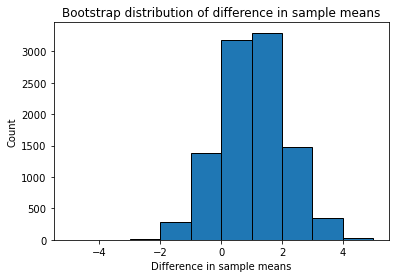

In [36]:
### Strategy #3 (provided by Vineel Yettella)
SWE = data['SWE']
SWE_nino = data[data.SST_anom>1.0]['SWE']

#We start by setting up a null hypothesis H0. 
#Our H0 will be that the difference in means of the two populations that the samples came from is equal to zero.
#We will use the bootstrap to test this null hypothesis.

#We next choose a significance level for the hypothesis test
alpha = 0.05

#All hypothesis tests need a test statistic.
#Here, we'll use the difference in sample means as the test statistic.
#create array to hold bootstrapped test statistic values
bootstrap_statistic = np.empty(10000)

#bootstrap 10000 times
for i in range(1,10000):
    
    #create a resample of SWE by sampling with replacement (same length as SWE)
    resample_original = np.random.choice(SWE, len(SWE), replace=True)
    
    #create a resample of SWE_nino by sampling with replacement (same length as SWE_nino)
    resample_nino = np.random.choice(SWE_nino, len(SWE_nino), replace=True)
    
    #Compute the test statistic from the resampled data, i.e., the difference in means
    bootstrap_statistic[i] = np.mean(resample_original) - np.mean(resample_nino)

#Let's plot the distribution of the test statistic
plt.hist(bootstrap_statistic,[-5,-4,-3,-2,-1,0,1,2,3,4,5],edgecolor='black')
plt.xlabel('Difference in sample means')
plt.ylabel('Count')
plt.title('Bootstrap distribution of difference in sample means')

#Create 95% CI from the bootstrapped distribution. The upper limit of the CI is defined as the 97.5% percentile
#and the lower limit as the 2.5% percentile of the boostrap distribution, so that 95% of the 
#distribution lies within the two limits

CI_up = np.percentile(bootstrap_statistic, 100*(1 - alpha/2.0))
CI_lo = np.percentile(bootstrap_statistic, 100*(alpha/2.0))

print(CI_up)
print(CI_lo)

#We see that the confidence interval contains zero, so we fail to reject the null hypothesis that the difference
#in means is equal to zero